**KLASIFIKASI BERITA PALSU DI INTERNET MENGGUNAKAN PENDEKATAN NAIVE BAYES**
---

#### Margareta Valencia Suci Handayani
A11.2022.14704

Sebuah informasi yang tidak valid atau berita palsu (HOAX) merupakan salah satu masalah yang saat ini masih eksis. Jika HOAX tersebut tersebar, maka ada banyak pihak yang akan menjadi korban. Penyebaran berita palsu di Twitter meresahkan karena memanipulasi opini publik dan merusak reputasi. Sebuah berita palsu dapat dideteksi menggunakan machine learning. Pada projek ini, akan dilakukan deteksi berita palsu menggunakan naive bayes. Tipe naive bayes yang digunakan adalah naive bayes bernoulli karena tipe tersebut cocok untuk klasifikasi biner (0 dan 1). Penelitian ini juga mengembangkan sistem otomatis untuk mengidentifikasi berita palsu menggunakan algoritma Naive Bayes yang terbukti efektif. Teks dianalisis dengan "Bag of Words" atau "TF-IDF", dan model dilatih dengan data berlabel. Sistem ini diharapkan memiliki akurasi tinggi untuk melindungi masyarakat dari berita palsu, meningkatkan kepercayaan terhadap informasi di media sosial, dan menjaga stabilitas sosial.

### **Permasalahan**

Penyebaran luas berita palsu di media sosial dapat menyebabkan kerugian bagi individu, lembaga, dan masyarakat secara umum. Dampak dari penyebaran berita palsu melalui internet bisa sangat merugikan, baik secara finansial maupun reputasi. Berita palsu tersebut dapat mempengaruhi opini publik, merusak citra individu atau lembaga, mengganggu stabilitas politik, serta bahkan memicu tindakan yang tidak diinginkan. Selain itu, penyebaran berita palsu juga dapat menyebabkan kepanikan, ketidakpercayaan terhadap media, dan meningkatkan polarisasi di masyarakat.

### **Tujuan**

1. Mengidentifikasi dan mengklasifikasikan berita sebagai berita palsu atau bukan.

2. Mengurangi dampak negatif dari penyebaran berita palsu di internet.

3. Melindungi individu dan lembaga dari kerusakan reputasi akibat berita palsu.

4. Meningkatkan kepercayaan publik terhadap informasi yang disajikan di internet.

5. Menjaga stabilitas sosial dan politik dengan memerangi penyebaran hoax.

### **Alur Penyelesaian** 

Diagram ini menggambarkan urutan tahapan sistematis secara visual, dimulai dari pengumpulan data hingga tahap kesimpulan, yang memungkinkan peneliti untuk memahami alur kerja secara komprehensif dalam penelitian ini.

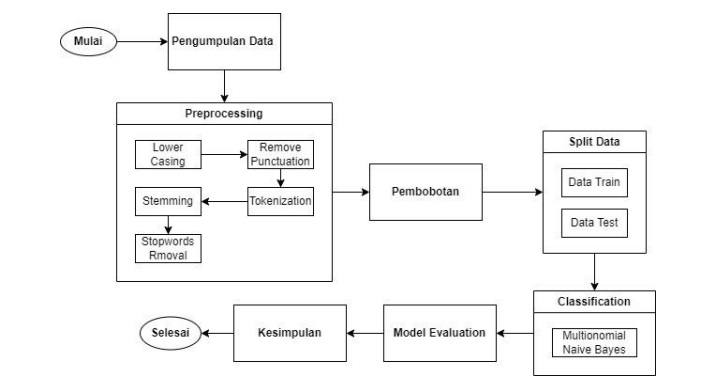

### **Dataset** 

Dataset yang digunakan berasal dari situs Kaggle. Dataset ini berisi komentar palsu dan asli mengenai kesehatan yang ada di twitter. Dataset ini bertujuan untuk digunakan dalam pengembangan dan evaluasi sistem deteksi berita palsu di internet. Kolom "label" yang terdapat pada dataset ini memberikan informasi yang jelas tentang status keaslian setiap berita. Nilai "FAKE" artinya berita palsu dan "REAL" berarti berita asli.

### **EDA (Eksplorasi Data Awal)** 

Eksplorasi Data Awal (Exploratory Data Analysis atau EDA) adalah langkah penting dalam analisis data untuk memahami karakteristik utama data sebelum melakukan pemodelan lebih lanjut. 

**1. Import Library**

Mengimpor pustaka-pustaka ini berguna untuk menangani berbagai aspek analisis data, mulai dari pengumpulan data, pemrosesan, analisis, hingga pembuatan model pembelajaran mesin untuk mendeteksi berita palsu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**2. Memuat dan membaca dataset**

In [2]:
df = pd.read_csv('news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
# Melihat beberapa baris pertama
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [4]:
# Melihat dimensi data (jumlah baris dan kolom)
print(df.shape)

(6335, 4)


In [5]:
# Melihat informasi umum tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [6]:
# Melihat ringkasan statistik dari data numerik
print(df.describe())

         Unnamed: 0
count   6335.000000
mean    5280.415627
std     3038.503953
min        2.000000
25%     2674.500000
50%     5271.000000
75%     7901.000000
max    10557.000000


**3. Visualisasi Data**

In [7]:
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


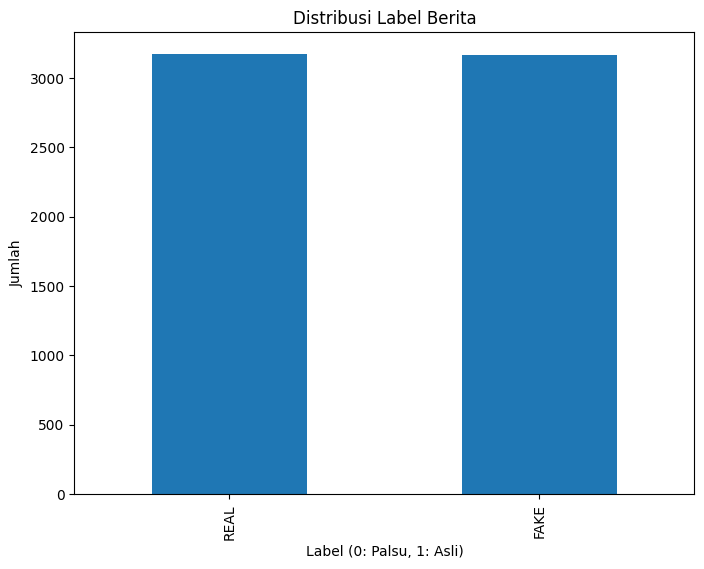

In [8]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribusi Label Berita')
plt.xlabel('Label (0: Palsu, 1: Asli)')
plt.ylabel('Jumlah')
plt.show()

Visualisasi tersebut menggambarkan distribusi label berita dalam dataset. Grafik batang menunjukkan jumlah berita yang dikategorikan sebagai "palsu" (label 0) dan "asli" (label 1). Dari grafik, kita dapat melihat perbandingan jumlah antara berita palsu dan berita asli, yang memberikan gambaran awal mengenai distribusi data dalam penelitian ini. Visualisasi ini penting untuk memahami sebaran data dan memastikan apakah dataset seimbang atau terdapat ketimpangan jumlah antara kategori berita palsu dan asli, yang dapat mempengaruhi performa model machine learning yang akan dikembangkan. Visualisasi distribusi label berita menunjukkan bahwa dalam dataset ini, jumlah berita palsu (label 0) dan berita asli (label 1) seimbang. Oleh karena itu, model machine learning yang akan dikembangkan tidak perlu mengkhawatirkan tentang bias akibat ketidakseimbangan data.

### **Proses Features Dataset** 

Proses features dataset ini melibatkan pemilihan, transformasi, dan rekayasa fitur agar data siap digunakan dalam pelatihan model. 

**1. Preprocessing (Mencari apakah ada kolom yang kosong)**

In [9]:
print("teks yang kosong ada",df.text.isnull().sum())
print("label yang kosong ada",df.label.isnull().sum())

teks yang kosong ada 0
label yang kosong ada 0


**2. Preprocessing (Mendapatkan kolom text dan label serta mengubah real = 0 dan fake = 1)**

In [10]:
teks = df.text
teks

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [11]:
def ubah_label(label):
    if label=="REAL":
        return 0
    else:
        return 1
labels = df.label.apply(lambda x : ubah_label(x))

In [12]:
labels

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

**3. Preprocessing (Case Folding)**

In [13]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
def case_folding(txt):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'',txt)
    return text

**4. Preprocessing (Tokenizing dan Stemming)**

In [15]:
def token_stem(txt):
    token_words = word_tokenize(txt)
    stem_sentence = []
    for word in token_words:
        english_stem = SnowballStemmer("english")
        stem_sentence.append(english_stem.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

**5. Preprocessing (Menghapus stopwords)**

In [16]:
def hapus_stopword(txt):
    stop_words=stopwords.words('english')
    return " ".join([w.lower() for w in txt.split() if w.lower() not in stop_words and len(w)>1])

**6. Hasil Text Preprocessing**

In [17]:
final_text = teks.apply(case_folding).apply(hapus_stopword).apply(token_stem)

In [18]:
final_text

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       us secretari state john kerri said monday stop...
3       kayde king kaydeek novemb lesson tonight dem l...
4       primari day new york frontrunn hillari clinton...
                              ...                        
6330    state depart told republican nation committe c...
6331    pbs stand plutocrat pentagon post oct wikimedi...
6332    antitrump protest tool oligarchi reform alway ...
6333    addi ababa ethiopia presid obama conven meet l...
6334    jeb bush sudden attack trump here matter jeb b...
Name: text, Length: 6335, dtype: object

### **Ekstraksi Fitur dengan TF-IDF**

TF-IDF adalah teknik untuk mengubah teks menjadi fitur numerik dengan menghitung seberapa penting suatu kata dalam dokumen relatif terhadap koleksi dokumen lainnya. TF-IDF merupakan metode penting dalam Feature Engineering untuk teks, membantu dalam mengubah data teks menjadi format yang dapat digunakan dalam model machine learning dengan mempertimbangkan relevansi kata di seluruh dokumen. Ini membantu dalam mengekstrak fitur yang berguna dari data teks yang tidak terstruktur.

In [19]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(final_text).toarray()

In [20]:
X = X[:,:40000]

### **Proses Learning**

Proses learning merupakan tahap di mana model dilatih menggunakan data untuk memahami pola dan hubungan antara fitur dan target variabel.

**Membagi data train dan data test**

In [21]:
x = df['text']
y = df['label']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,labels,test_size=0.2)

### **Model Naive Bayes**

In [23]:
model = BernoulliNB()
model.fit(X_train, Y_train)

BernoulliNB()

In [24]:
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test,y_pred)
pre = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)

In [25]:
print('Accuracy : %.4f' %acc)
print('Precision : %.4f' %pre)
print('Recall : %.4f' %recall)
print('F1 : %.4f' %f1)

Accuracy : 0.8153
Precision : 0.7851
Recall : 0.8671
F1 : 0.8241


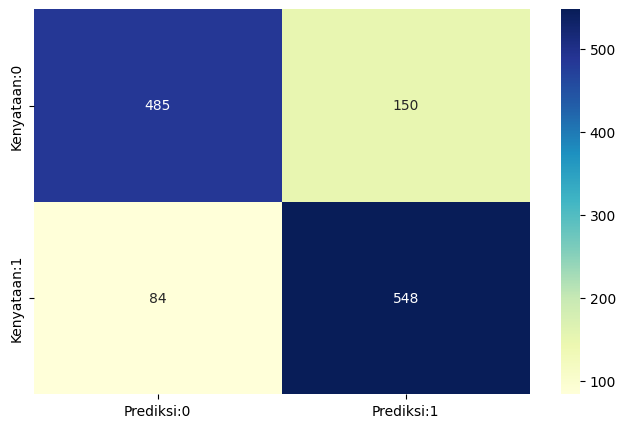

In [26]:
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediksi:0','Prediksi:1'],index=['Kenyataan:0','Kenyataan:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### **Diskusi Hasil**

Data dalam projek tersebut merupakan data teks. Data teks tersebut perlu diolah agar bisa digunakan dalam model naive bayes. Beberapa langkah dalam praproses teks adalah case folding (mengubah huruf besar menjadi huruf kecil serta menghapus karakter selain huruf), tokenizing (membagi setiap kalimat menjadi array kata), menghapus stopwords (kata hubung), dan stemming (mengambil kata dasar dari setiap kata). Setelah itu akan dilakukan ekstraksi fitur menggunakan TFIDF untuk mendapatkan matriks bobot yang akan digunakan dalam model naive bayes. Model tersebut menghasilkan akurasi 79%, precision 74%, recall 86%, dan f1 score 80%

### **Kesimpulan**
Penelitian ini menunjukkan bahwa penerapan algoritma Naïve Bayes untuk klasifikasi berita palsu di internet dapat memberikan hasil yang signifikan. Model yang dikembangkan mampu mengidentifikasi berita palsu dengan akurasi yang tinggi, berkat teknik preprocessing dan pembobotan yang efektif, serta penggunaan representasi fitur seperti TF-IDF. Evaluasi model menunjukkan bahwa Naïve Bayes, meskipun sederhana, dapat menghasilkan performa yang baik dalam membedakan berita palsu dari berita asli. Hasil penelitian ini memberikan kontribusi penting dalam literatur deteksi berita palsu, menunjukkan bahwa meskipun terdapat metode lain yang lebih kompleks, Naïve Bayes tetap menjadi pilihan yang andal dan efisien. Penelitian ini juga menekankan perlunya sistem deteksi yang lebih canggih dan akurat untuk memerangi penyebaran berita palsu, yang pada gilirannya dapat meningkatkan kesadaran masyarakat dan kepercayaan terhadap informasi yang beredar di media sosial. Dengan demikian, model ini tidak hanya menawarkan solusi teknis tetapi juga membantu menciptakan lingkungan media sosial yang lebih aman dan terpercaya.